# Análise Exploratória dos Dados para Modelagem (EDA) 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [5]:
# Carregar os dados preparados para o modelo
try:
    df_model = pd.read_csv('dados_modelo.csv')
except FileNotFoundError:
    print("Erro: Arquivo 'dados_modelo.csv' não encontrado. Por favor, verifique o nome e o caminho do arquivo.")
    exit()

print("--- Visão Geral dos Dados ---")
print("Colunas disponíveis:")
print(df_model.columns)
print("\nTipos de dados iniciais:")
df_model.info()

--- Visão Geral dos Dados ---
Colunas disponíveis:
Index(['genero', 'idade', 'altura', 'peso', 'hist_familiar',
       'freq_alimentos_caloricos', 'freq_consumo_vegetais',
       'qtd_refeicoes_dia', 'alimentos_entre_refeicoes', 'flag_fumo',
       'qtd_dia_agua', 'monitoramento_calorias', 'freq_ativ_fisica',
       'freq_uso_tech', 'freq_alcool', 'meio_transporte', 'nivel_obesidade',
       'imc', 'categoria_imc', 'lifestyle_score', 'indice_sedentarismo'],
      dtype='object')

Tipos de dados iniciais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   genero                     2111 non-null   object 
 1   idade                      2111 non-null   float64
 2   altura                     2111 non-null   float64
 3   peso                       2111 non-null   float64
 4   hist_familiar              2111 non-null  

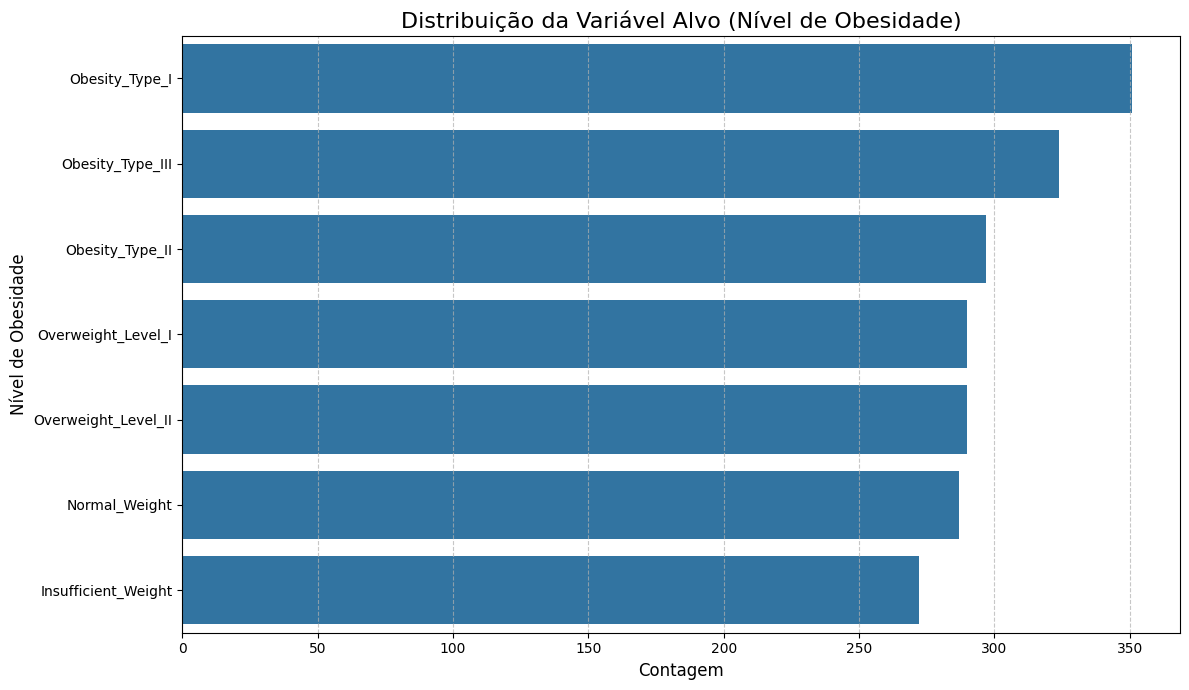

In [7]:
# --- 1. Análise da Variável Alvo (Target) ---
plt.figure(figsize=(12, 7))
sns.countplot(y=df_model['nivel_obesidade'], order = df_model['nivel_obesidade'].value_counts().index)
plt.title('Distribuição da Variável Alvo (Nível de Obesidade)', fontsize=16)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Nível de Obesidade', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--- Análise Visual das Variáveis Categóricas: ['genero', 'hist_familiar', 'freq_alimentos_caloricos', 'alimentos_entre_refeicoes', 'flag_fumo', 'monitoramento_calorias', 'freq_alcool', 'meio_transporte'] ---


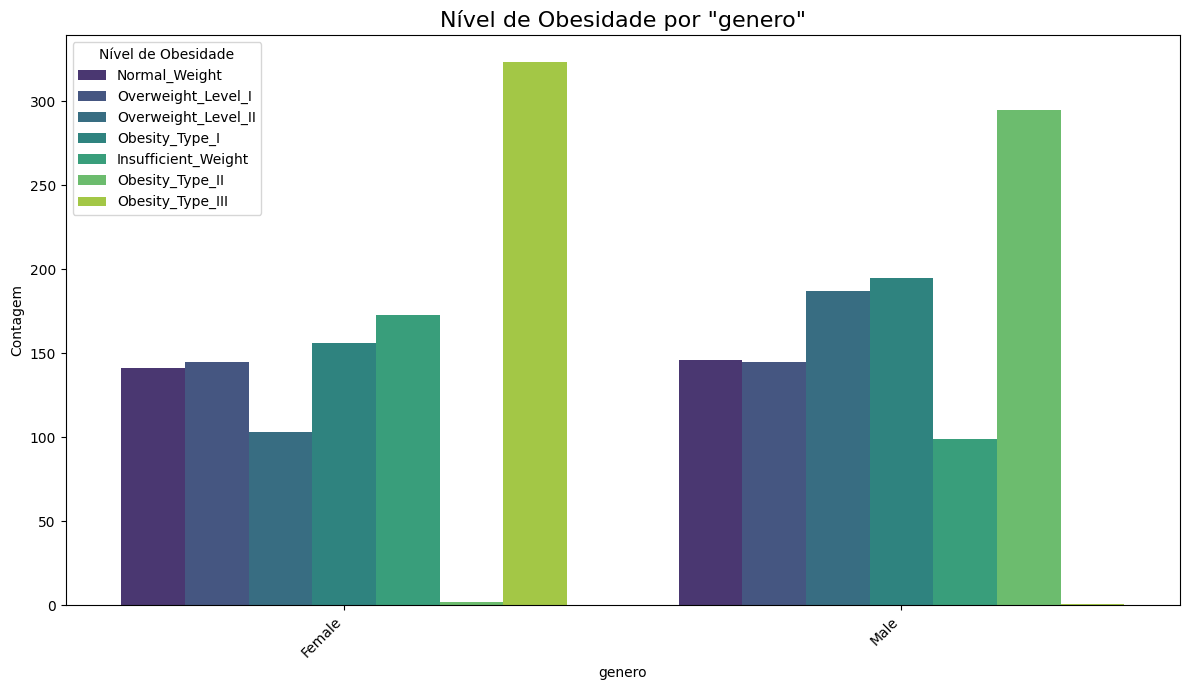

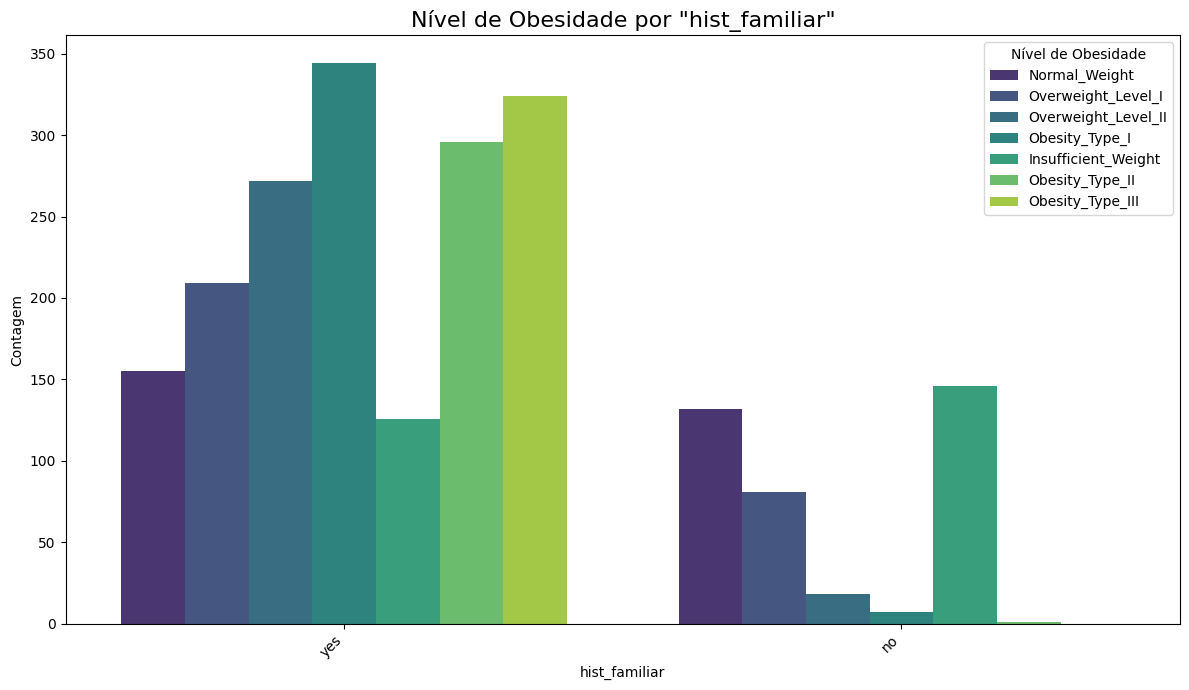

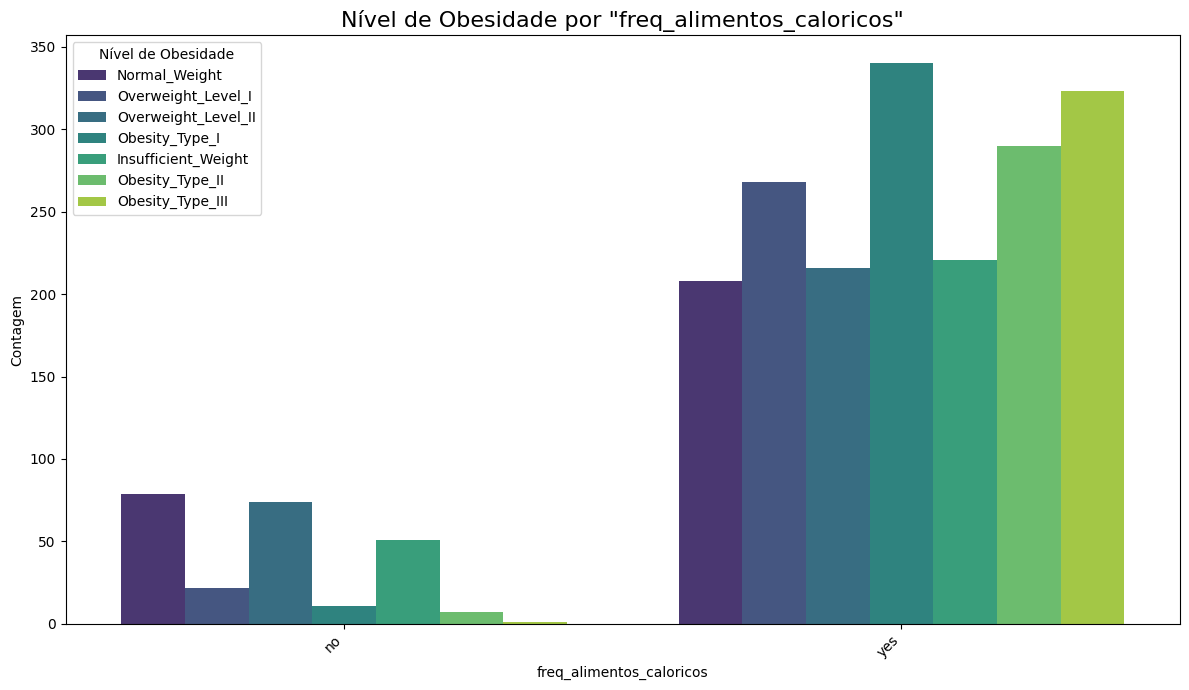

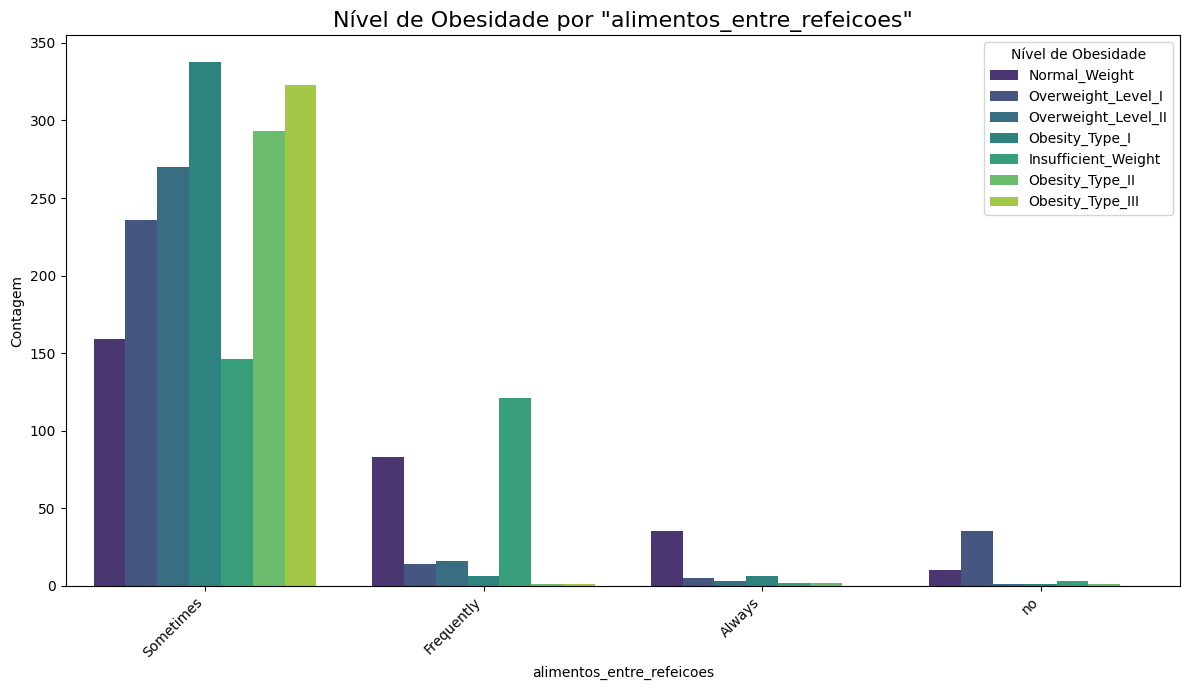

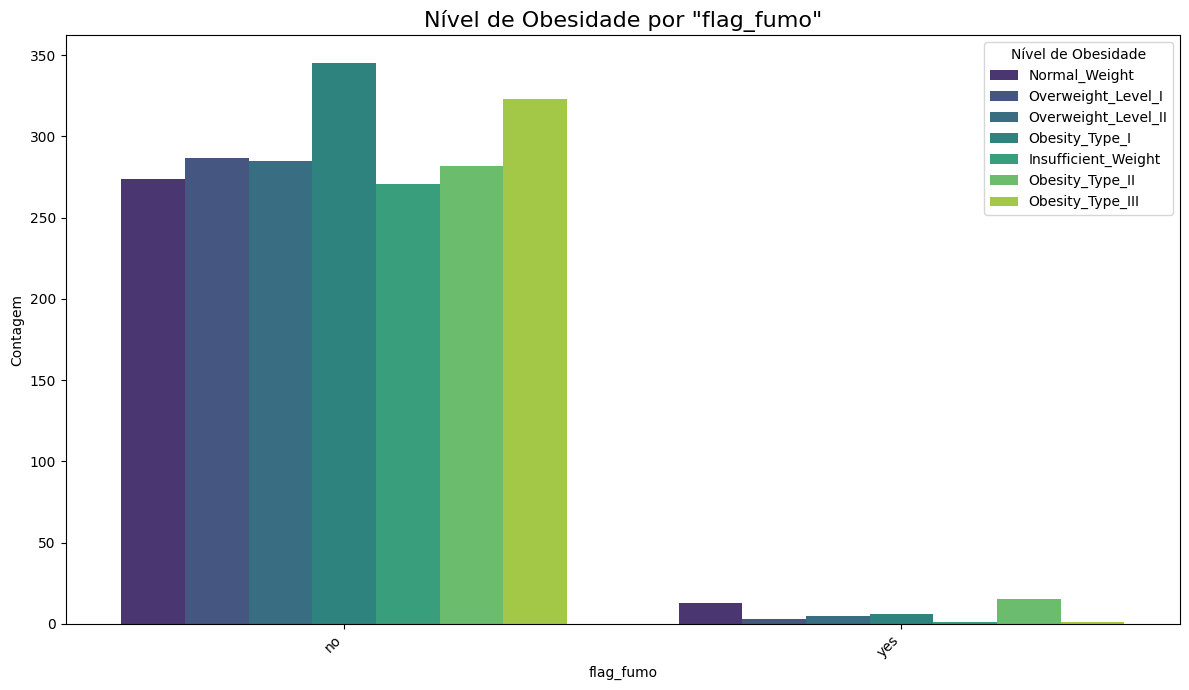

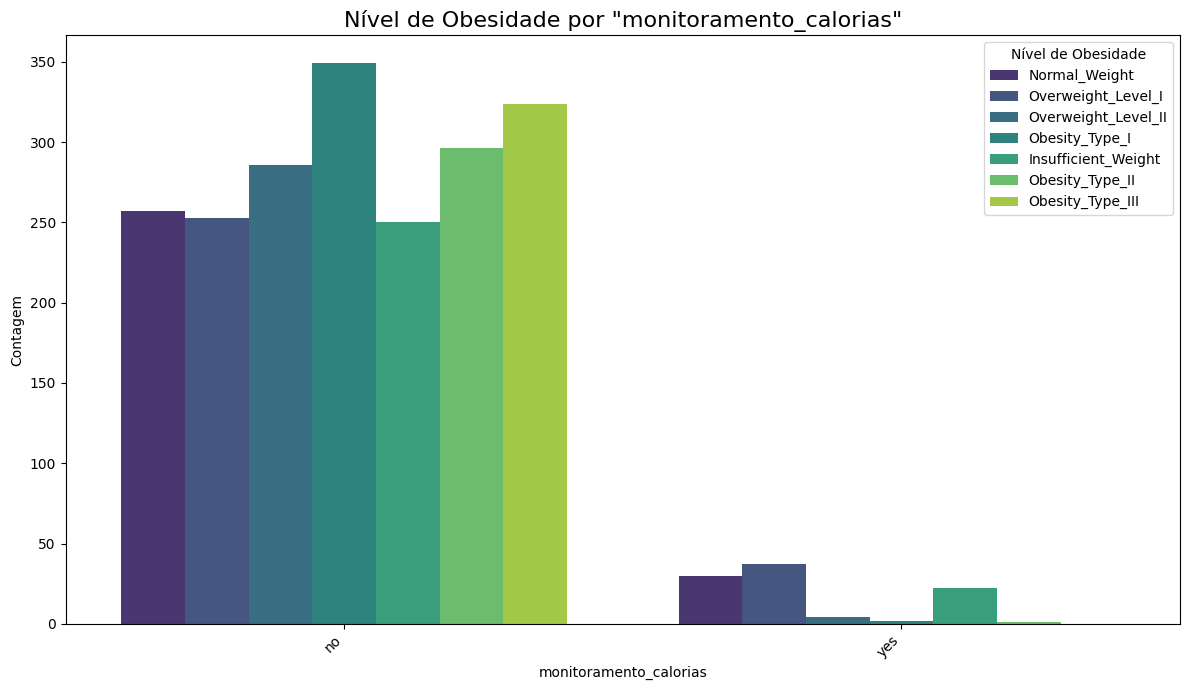

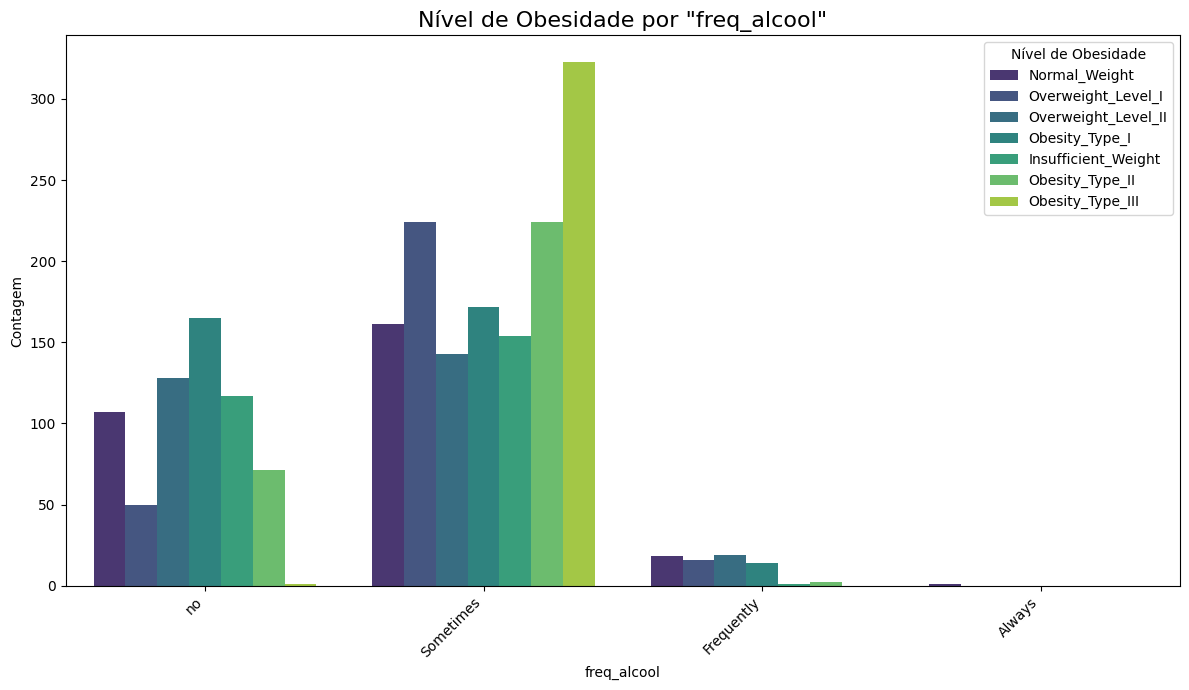

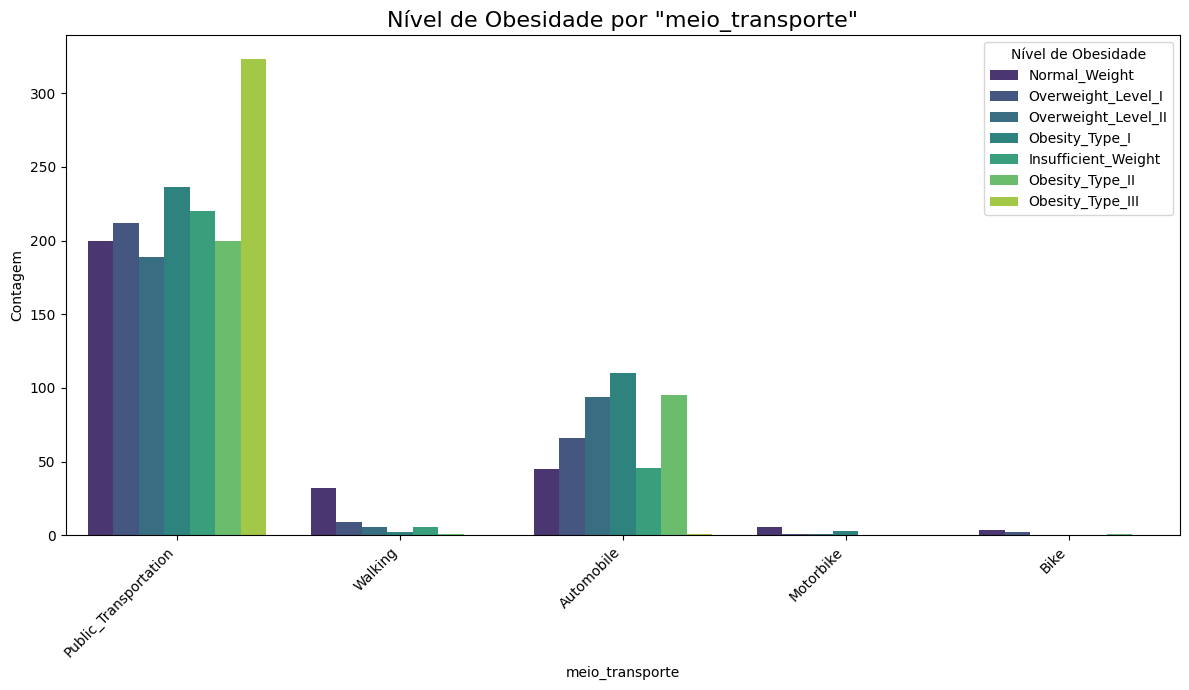

In [ ]:
# --- 2. Análise de Variáveis Categóricas vs. Alvo (Visualização) ---

categorical_features = df_model.select_dtypes(include=['object']).drop(columns=['nivel_obesidade', 'categoria_imc']).columns

print(f"\n--- Análise Visual das Variáveis Categóricas: {list(categorical_features)} ---")

for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df_model, x=feature, hue='nivel_obesidade', palette='viridis')
    plt.title(f'Nível de Obesidade por "{feature}"', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Contagem')
    plt.xlabel(feature)
    plt.legend(title='Nível de Obesidade')
    plt.tight_layout()
    plt.show()

In [11]:
# --- 3. Preparação para Análise de Correlação Avançada (One-Hot Encoding) ---
print("\n--- Preparando dados para a matriz de correlação completa ---")
df_encoded = df_model.copy()

# Aplicar One-Hot Encoding nas variáveis categóricas
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=True)

# Codificar a variável alvo (y) e a categoria de IMC para incluí-las na matriz de correlação
le = LabelEncoder()
df_encoded['obesity_level_encoded'] = le.fit_transform(df_encoded['nivel_obesidade'])
df_encoded['BMI_Category_encoded'] = le.fit_transform(df_encoded['categoria_imc'])

# Remover as colunas de texto originais que já foram codificadas
df_encoded = df_encoded.drop(columns=['nivel_obesidade', 'categoria_imc'])

print("Dados transformados com One-Hot Encoding prontos para análise de correlação.")



--- Preparando dados para a matriz de correlação completa ---
Dados transformados com One-Hot Encoding prontos para análise de correlação.


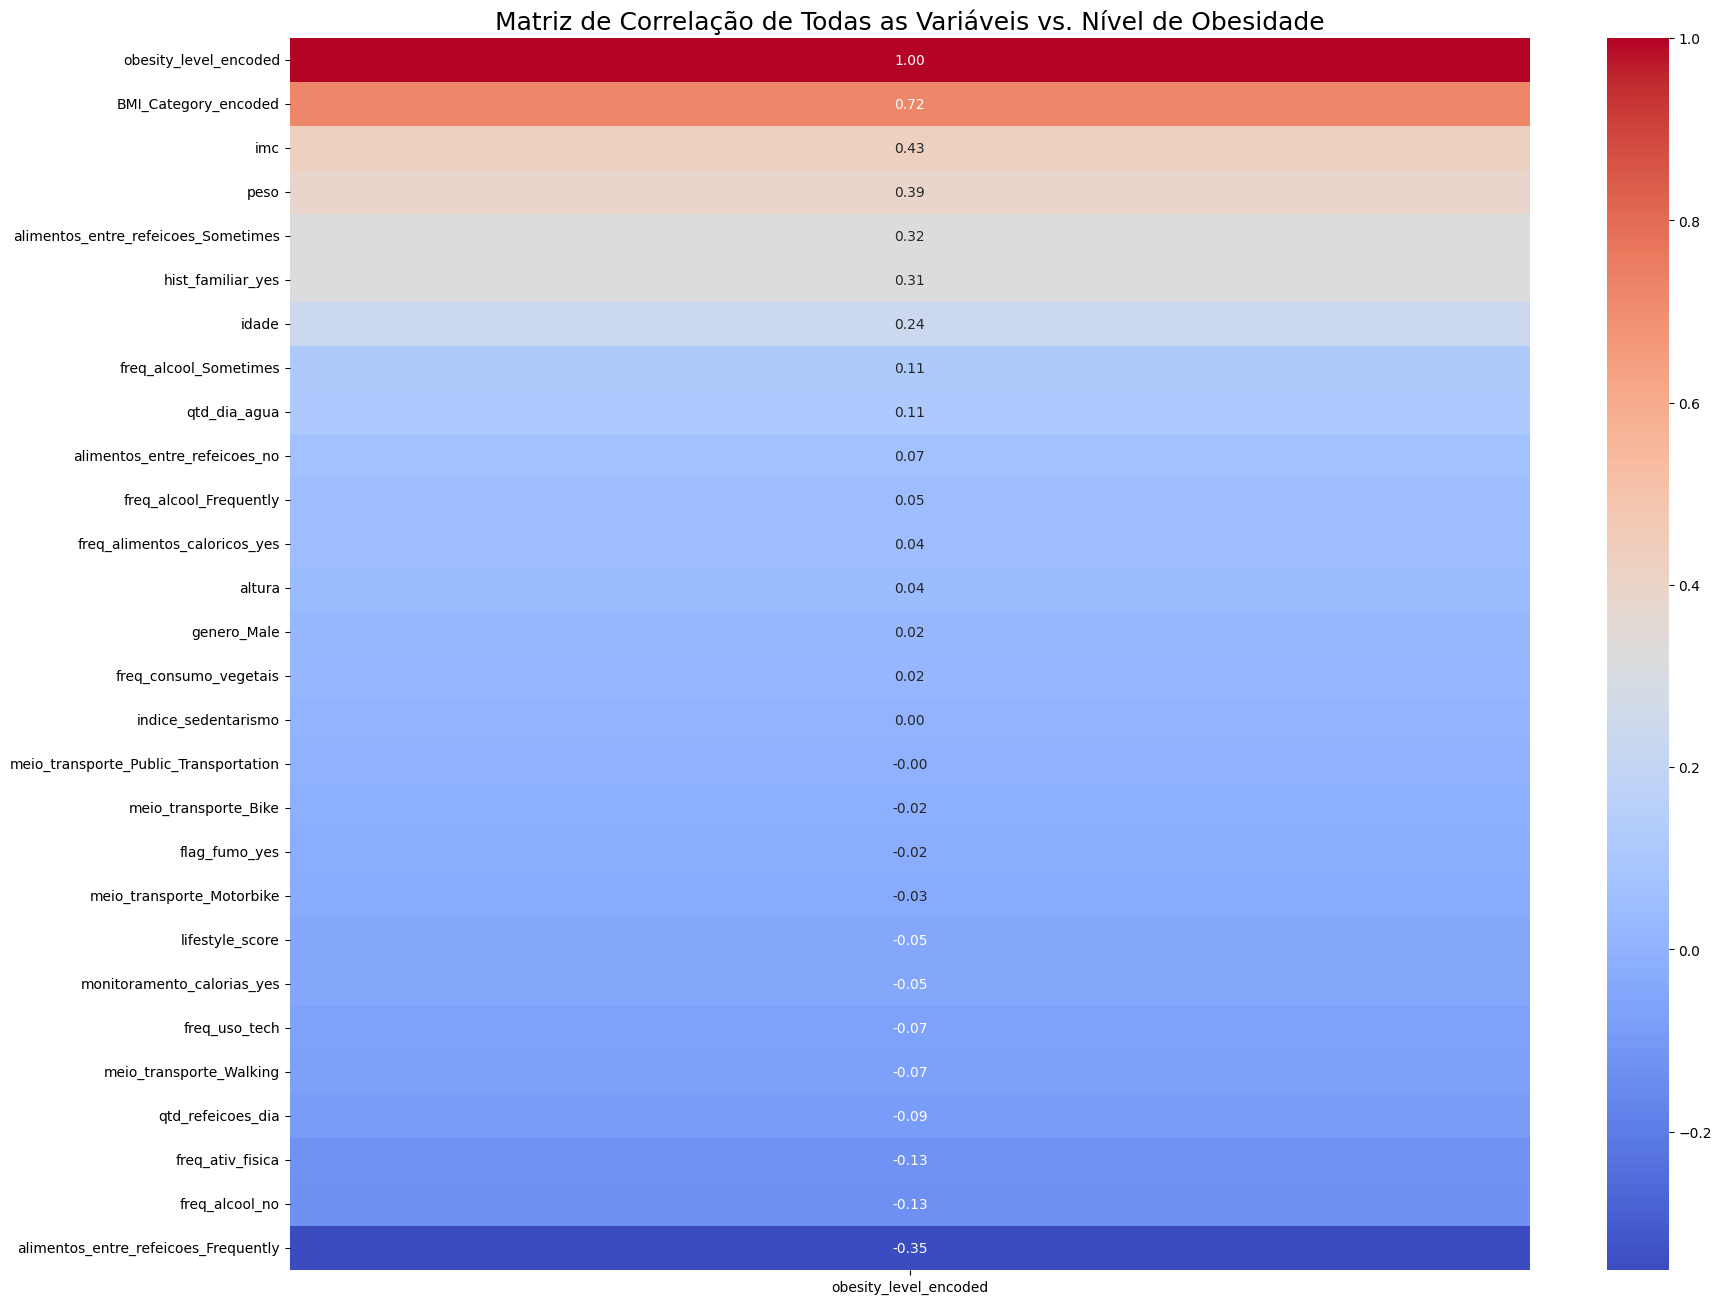


Análise exploratória para o modelo concluída.


In [13]:
# --- 4. Análise de Correlação Completa ---
plt.figure(figsize=(20, 16))
correlation_matrix = df_encoded.corr()

# Focar nas correlações com a nossa variável alvo codificada
corr_target = correlation_matrix[['obesity_level_encoded']].sort_values(by='obesity_level_encoded', ascending=False)

sns.heatmap(corr_target, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação de Todas as Variáveis vs. Nível de Obesidade', fontsize=18)
plt.show()

print("\nAnálise exploratória para o modelo concluída.")